# #Library Import

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

# 1. 데이터 전처리

In [4]:
# 설문조사 csv 파일 dataframe 불러오기
df = pd.read_csv('mbti_x_인테리어.csv')

In [5]:
quiz_df = df.loc[:,'1. 혼자 여행을 가기로 해서 숙소를 잡았다. 그 숙소는?':'20. 팀플에서 조장이 되었을 때 나는?']

In [6]:
quiz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   1. 혼자 여행을 가기로 해서 숙소를 잡았다. 그 숙소는?            523 non-null    object
 1   2. 나에게 5000만원이 생겼다. 내가 투자할 주식 종목은?          523 non-null    object
 2   3. 친구가 중요한 주식 정보를 주었다. 나의 행동은?              523 non-null    object
 3   4. 친구가 갑자기 여행을 가자고 한다. 나의 행동은?              523 non-null    object
 4   5. 비도 오고 마음도 우중충하고 심심하다. 그럴 때 나는?           523 non-null    object
 5   6. 지나가는 사람이 길을 물어본다. 나의 행동은?                523 non-null    object
 6   7. 친구가 준비한 시험에서 떨어졌다. 당신의 행동은?              523 non-null    object
 7   8. 첫 소개팅 하는 날! 나는 무슨 옷을 입을 것인가?             523 non-null    object
 8   9. 갑자기 번뜩이는 아이디어가 생겨났다. 언제인가?               523 non-null    object
 9   10. 내가 생각하는 미래는?                            523 non-null    object
 10  11. 회사에 입사하게 되었을 때 내가 들어가고

In [7]:
# mbti 20개 질문, 답변 변환

# e / s / f / j = +1 => "양수"
# i / n / t / p = -1 => "음수"

# labeling import
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# 20문항 따로 데이터프레임
quiz_df = df.iloc[:, 5:25]
quiz_df.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# labeling 
for i in range(1, 21):
    quiz = quiz_df[i]
    encoder.fit(quiz)
    quiz2 = encoder.transform(quiz)
    quiz_df[i] = quiz2
    
# +1: 1인 컬럼값들을 +1로, 0인 컬럼값들을 -1로
for i in [1, 9, 6, 10, 18, 3, 15, 19, 8, 12]:
    quiz_df[i][quiz_df[i].values == 1] = 1
    quiz_df[i][quiz_df[i].values == 0] = -1

# -1: 1인 컬럼값들을 -1로, 0인 컬럼값들을 +1로
for j in [5, 13, 17, 2, 14, 7, 11, 4, 16, 20]:
    quiz_df[j][quiz_df[j].values == 1] = -1
    quiz_df[j][quiz_df[j].values == 0] = 1
    
# MBTI: '모름'의 EI, SN, FT, JP 파악 (양수 or 음수)
quiz_df['EI'] = 0
quiz_df['SN'] = 0
quiz_df['FT'] = 0
quiz_df['JP'] = 0

for i in range(1, 21):
    if i % 4 == 1:
        quiz_df['EI'] += quiz_df[i]
    elif i % 4 == 2:
        quiz_df['SN'] += quiz_df[i]
    elif i % 4 == 3:
        quiz_df['FT'] += quiz_df[i]
    elif i % 4 == 0:
        quiz_df['JP'] += quiz_df[i]

# mbti: '모름' 사람들의 점수
nombti = quiz_df.loc[:, 'EI':'JP']
nombti

,EI,SN,FT,JP
0,3,1,1,-1
1,-5,-1,3,-5
2,1,1,1,-1
3,-3,1,5,3
4,3,1,-1,-1
...,...,...,...,...
518,-3,1,3,-3
519,-3,3,-1,-3
520,-5,3,-3,5
521,-5,1,-3,3


In [8]:
# 혹시 모를 상황 대비 copy
nombti2 = nombti.copy()

# # EI, SN, FT, JP 계산값들 str으로
for i in range(len(nombti2.index)):
    for j in ['EI','SN','FT','JP']:
        if nombti2.loc[i, j] > 0:
            if j == 'EI':
                nombti2.loc[i, j] = 'E'
            elif j == 'SN':
                nombti2.loc[i, j] = 'S'
            elif j == 'FT':
                nombti2.loc[i,j] = 'F'
            elif j == 'JP':
                nombti2.loc[i, 'JP'] = 'J'
        else:
            if j == 'EI':
                nombti2.loc[i, j] = 'I'
            elif j == 'SN':
                nombti2.loc[i, j] = 'N'
            elif j == 'FT':
                nombti2.loc[i,j] = 'T'
            elif j == 'JP':
                nombti2.loc[i, 'JP'] = 'P'


# 앞쪽 컬럼값들(str) 더해서 mbti 판단
nombti2['mbti_guess'] = nombti2.iloc[:, 0] + nombti2.iloc[:, 1] + nombti2.iloc[:, 2] + nombti2.iloc[:, 3]
nombti2

,EI,SN,FT,JP,mbti_guess
0,E,S,F,P,ESFP
1,I,N,F,P,INFP
2,E,S,F,P,ESFP
3,I,S,F,J,ISFJ
4,E,S,T,P,ESTP
...,...,...,...,...,...
518,I,S,F,P,ISFP
519,I,S,T,P,ISTP
520,I,S,T,J,ISTJ
521,I,S,T,J,ISTJ


In [9]:
mbti_df = df.rename(columns={'1. 당신의 MBTI는 무엇인가요?':'mbti',
                             '2. 당신의 성별은?':'sex',
                             '3. 당신의 연령대는?':'age',
                             '4. 당신의 직업은?':'job',
                             '1. 인테리어에 얼마나 관심이 있으신가요?':'like',
                             '3. 집을 볼 때 가장 중요시하는 공간은 어디인가요?':'space',
                             '4. 가장 좋아하는 색깔톤은 무엇인가요?':'color',
                             '5. 인테리어에서 가장 중요하다 생각하는 것은 무엇인가요?':'miv',
                             '모던':'modern',
                             '북유럽': 'nor_eur', 
                             '내추럴': 'natural', 
                             '빈티지': 'vintage', 
                             '프로방스 / 로맨틱': 'provence', 
                             '클래식 / 앤틱': 'classic', 
                             '한국 / 아시아': 'asia', 
                             '유니크': 'unique', 
                             'MIX': 'mix'})
df2 = pd.get_dummies(mbti_df['color'])
df3 = pd.get_dummies(mbti_df['sex'])
df4 = pd.get_dummies(mbti_df['age'])

del(mbti_df['miv'])
del(mbti_df['color'])
del(mbti_df['space'])
del(mbti_df['Timestamp'])
del(mbti_df['2. 당신에게 집이란?'])
mbti_df = mbti_df.drop(columns = mbti_df.loc[:, '1. 혼자 여행을 가기로 해서 숙소를 잡았다. 그 숙소는?':'20. 팀플에서 조장이 되었을 때 나는?'])
mbti_df = pd.concat([mbti_df,df2,df3,df4,nombti2],axis=1)

mbti_df['real_mbti'] = mbti_df['mbti']
mbti_df['real_mbti'][mbti_df['real_mbti']=='모름'] = mbti_df['mbti_guess']

mbti_df

,mbti,sex,age,job,like,modern,nor_eur,natural,vintage,provence,classic,asia,unique,mix,모노톤,우드톤,웜톤,쿨톤,파스텔톤,남자,여자,10대,20대,30대,40대,50대,60대 이상,EI,SN,FT,JP,mbti_guess,real_mbti
0,INTP,남자,20대,무직,1,5,3,3,3,4,3,5,2,3,1,0,0,0,0,1,0,0,1,0,0,0,0,E,S,F,P,ESFP,INTP
1,INFP,남자,20대,대학생,4,5,4,3,1,1,2,3,1,4,0,1,0,0,0,1,0,0,1,0,0,0,0,I,N,F,P,INFP,INFP
2,ISTP,남자,20대,대학생,5,5,4,3,1,1,1,3,1,4,1,0,0,0,0,1,0,0,1,0,0,0,0,E,S,F,P,ESFP,ISTP
3,INFJ,남자,20대,무직,4,5,3,4,1,1,1,5,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,I,S,F,J,ISFJ,INFJ
4,ESTP,남자,20대,무직,5,5,3,4,1,2,1,4,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,E,S,T,P,ESTP,ESTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,INFP,여자,10대,중고등학생,3,5,4,4,4,2,4,4,2,3,1,0,0,0,0,0,1,1,0,0,0,0,0,I,S,F,P,ISFP,INFP
519,INTJ,여자,20대,대학생,2,4,2,3,2,3,4,4,2,2,0,0,0,0,1,0,1,0,1,0,0,0,0,I,S,T,P,ISTP,INTJ
520,ISTJ,남자,20대,대학생,1,4,1,1,1,1,4,4,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,I,S,T,J,ISTJ,ISTJ
521,모름,남자,20대,직장인,3,5,2,2,1,1,1,4,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,I,S,T,J,ISTJ,ISTJ


In [10]:
mbti_df['real_EI'] = ''
mbti_df['real_SN'] = ''
mbti_df['real_FT'] = ''
mbti_df['real_JP'] = ''

for i in range(len(mbti_df['real_mbti'])):
    mbti_df['real_EI'][i] = mbti_df['real_mbti'].values[i][0]
    mbti_df['real_SN'][i] = mbti_df['real_mbti'].values[i][1]
    mbti_df['real_FT'][i] = mbti_df['real_mbti'].values[i][2]
    mbti_df['real_JP'][i] = mbti_df['real_mbti'].values[i][3]

mbti_df

,mbti,sex,age,job,like,modern,nor_eur,natural,vintage,provence,classic,asia,unique,mix,모노톤,우드톤,웜톤,쿨톤,파스텔톤,남자,여자,10대,20대,30대,40대,50대,60대 이상,EI,SN,FT,JP,mbti_guess,real_mbti,real_EI,real_SN,real_FT,real_JP
0,INTP,남자,20대,무직,1,5,3,3,3,4,3,5,2,3,1,0,0,0,0,1,0,0,1,0,0,0,0,E,S,F,P,ESFP,INTP,I,N,T,P
1,INFP,남자,20대,대학생,4,5,4,3,1,1,2,3,1,4,0,1,0,0,0,1,0,0,1,0,0,0,0,I,N,F,P,INFP,INFP,I,N,F,P
2,ISTP,남자,20대,대학생,5,5,4,3,1,1,1,3,1,4,1,0,0,0,0,1,0,0,1,0,0,0,0,E,S,F,P,ESFP,ISTP,I,S,T,P
3,INFJ,남자,20대,무직,4,5,3,4,1,1,1,5,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,I,S,F,J,ISFJ,INFJ,I,N,F,J
4,ESTP,남자,20대,무직,5,5,3,4,1,2,1,4,1,2,0,1,0,0,0,1,0,0,1,0,0,0,0,E,S,T,P,ESTP,ESTP,E,S,T,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,INFP,여자,10대,중고등학생,3,5,4,4,4,2,4,4,2,3,1,0,0,0,0,0,1,1,0,0,0,0,0,I,S,F,P,ISFP,INFP,I,N,F,P
519,INTJ,여자,20대,대학생,2,4,2,3,2,3,4,4,2,2,0,0,0,0,1,0,1,0,1,0,0,0,0,I,S,T,P,ISTP,INTJ,I,N,T,J
520,ISTJ,남자,20대,대학생,1,4,1,1,1,1,4,4,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,I,S,T,J,ISTJ,ISTJ,I,S,T,J
521,모름,남자,20대,직장인,3,5,2,2,1,1,1,4,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,I,S,T,J,ISTJ,ISTJ,I,S,T,J


# 2. EDA

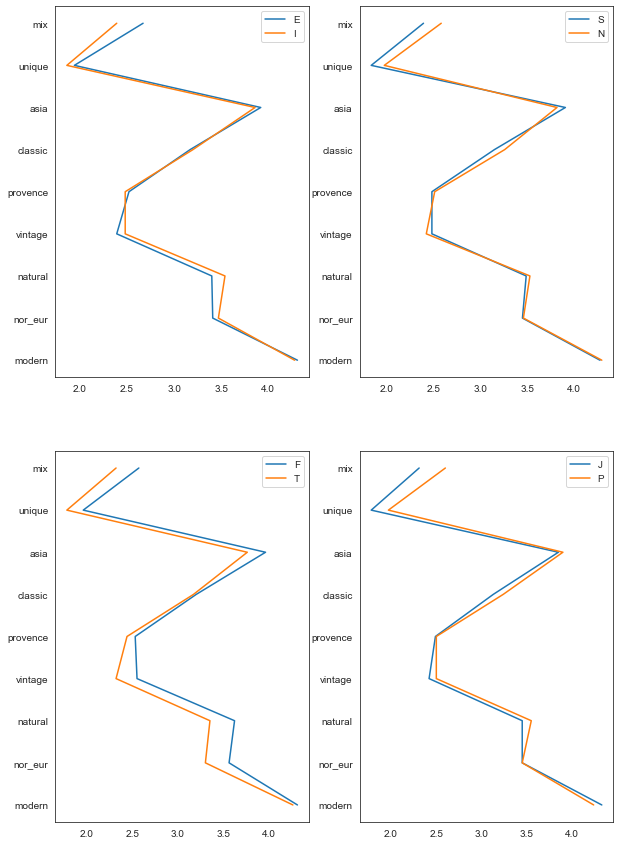

In [11]:
# mbti 각 성향항목별 점수 분포
sns.set_style('white')

# 인테리어 무드 9개
mood = ['modern', 'nor_eur', 'natural', 'vintage', 'provence', 'classic', 'asia', 'unique', 'mix']
mood_list = []
for i in mood:
  mood_list.append(round(mbti_df[mbti_df['EI']=='E'][i].mean(),2))

mood_list2 = []
for i in mood:
  mood_list2.append(round(mbti_df[mbti_df['EI']=='I'][i].mean(),2))

mood_list3 = []
for i in mood:
  mood_list3.append(round(mbti_df[mbti_df['SN']=='S'][i].mean(),2))

mood_list4 = []
for i in mood:
  mood_list4.append(round(mbti_df[mbti_df['SN']=='N'][i].mean(),2))

mood_list5 = []
for i in mood:
  mood_list5.append(round(mbti_df[mbti_df['FT']=='F'][i].mean(),2))

mood_list6 = []
for i in mood:
  mood_list6.append(round(mbti_df[mbti_df['FT']=='T'][i].mean(),2))

mood_list7 = []
for i in mood:
  mood_list7.append(round(mbti_df[mbti_df['JP']=='J'][i].mean(),2))

mood_list8 = []
for i in mood:
  mood_list8.append(round(mbti_df[mbti_df['JP']=='P'][i].mean(),2))


plt.figure(figsize=(10,15))

# E, I 성향 사람들의 점수 분포
plt.subplot(221)
plt.plot(mood_list, mood, label='E')
plt.plot(mood_list2,mood, label='I')
plt.legend(ncol=1)

# S, N 성향 사람들의 점수 분포
plt.subplot(222)
plt.plot(mood_list3, mood,  label='S')
plt.plot(mood_list4,mood,  label='N')
plt.legend(ncol=1)

# F, T 성향 사람들의 점수 분포
plt.subplot(223)
plt.plot(mood_list5, mood,  label='F')
plt.plot(mood_list6,mood,  label='T')
plt.legend(ncol=1)

# J, P 성향 사람들의 점수 분포
plt.subplot(224)
plt.plot(mood_list7, mood,  label='J')
plt.plot(mood_list8,mood,  label='P')
plt.legend(ncol=1)

plt.show()